In [235]:
# importing modules
import pandas as pd
import numpy as np

# for visualization of data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for scaling
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# for KMeans clustering
from sklearn.cluster import KMeans

# for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [236]:
# Reading file
df = pd.read_csv(r"D:\Upgrad - PG diploma - datascience\Course 2_ML-I\Clustering assignment\Country-data.csv")
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [237]:
# shape of the data frame
df.shape

(167, 10)

In [238]:
# inspecting basic things in data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [239]:
# data frame summary
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# HANDLING MISSING VALUES AND DUPLICATES

In [240]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no missing values

In [241]:
print('shape of data frame before dropping duplicates:',end = ' ')
print(df.shape)
df.drop_duplicates(subset = None,inplace = True)
print('shape of data frame after dropping duplicates:',end = ' ')
print(df.shape)

shape of data frame before dropping duplicates: (167, 10)
shape of data frame after dropping duplicates: (167, 10)


There are no duplicates

# TRANSFORMING COLUMNS WITH VALUES IN PERCENTAGES TO ABSOLUTE VALUES

The columns exports,imports,health are represented using percentages, but we cannot capture exact information using percentages because if two countries are close in percentages we cannot compare both countries in that aspect because the absolute values might be different by a lot.Hence transforming them into absolute values will be useful in comparing one country with another

In [242]:
df['exports'] = df['exports'] * df['gdpp']/100
df['imports'] = df['imports'] * df['gdpp']/100
df['health'] = df['health'] * df['gdpp']/100
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


# OUTLIER ANALYSIS

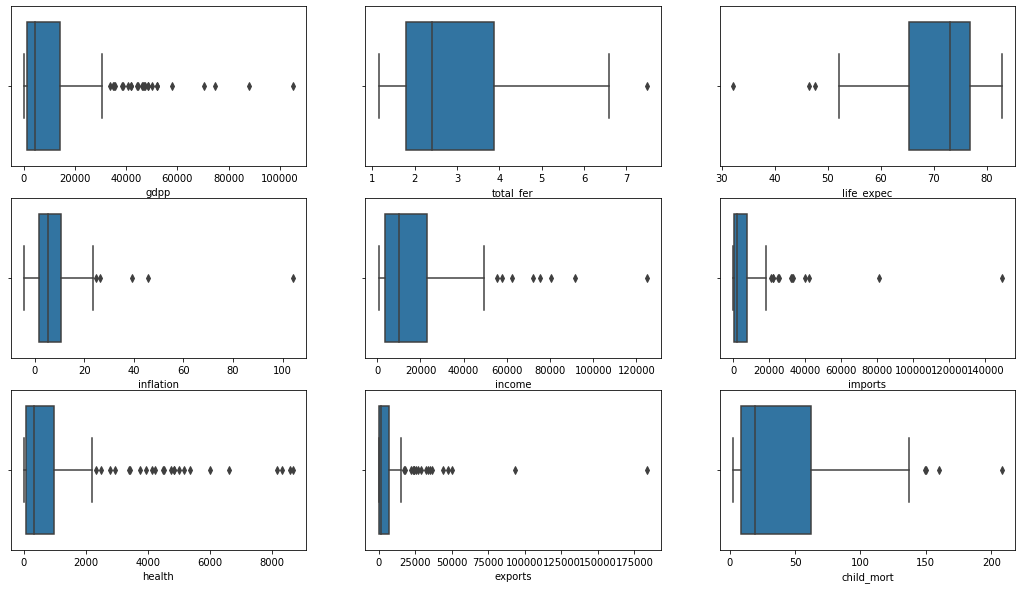

In [243]:
plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.boxplot(df.gdpp)
plt.subplot(3, 3, 2)
sns.boxplot(df.total_fer)
plt.subplot(3, 3, 3)
sns.boxplot(df.life_expec)
plt.subplot(3, 3, 4)
sns.boxplot(df.inflation)
plt.subplot(3, 3, 5)
sns.boxplot(df.income)
plt.subplot(3, 3, 6)
sns.boxplot(df.imports)
plt.subplot(3, 3, 7)
sns.boxplot(df.health)
plt.subplot(3, 3, 8)
sns.boxplot(df.exports)
plt.subplot(3, 3, 9)
sns.boxplot(df.child_mort)
plt.show()

As we can see there are outliers but in interest of business decision, it is better to not remove outliers because removing them might affect the ranking of the countries for receiving financial aid. 

# EXPLORATORY DATA ANALYSIS

In [244]:
df.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

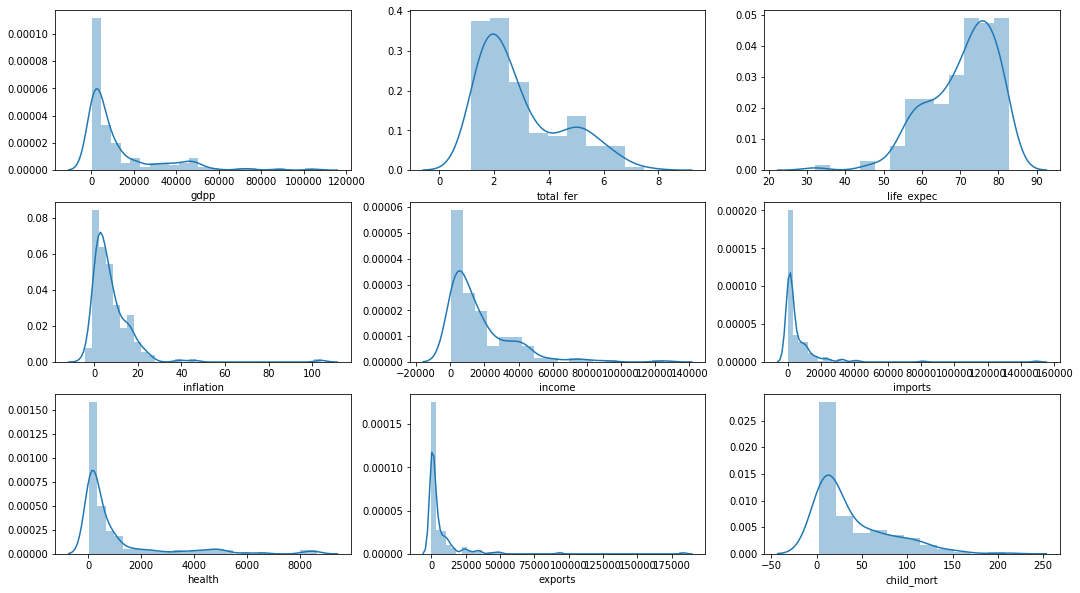

In [245]:
# univariate analysis
plt.figure(figsize=(18, 10))
plt.subplot(3, 3, 1)
sns.distplot(df.gdpp)
plt.subplot(3, 3, 2)
sns.distplot(df.total_fer)
plt.subplot(3, 3, 3)
sns.distplot(df.life_expec)
plt.subplot(3, 3, 4)
sns.distplot(df.inflation)
plt.subplot(3, 3, 5)
sns.distplot(df.income)
plt.subplot(3, 3, 6)
sns.distplot(df.imports)
plt.subplot(3, 3, 7)
sns.distplot(df.health)
plt.subplot(3, 3, 8)
sns.distplot(df.exports)
plt.subplot(3, 3, 9)
sns.distplot(df.child_mort)
plt.show()

Insights:
- As we can see every column is skewed either to the right or to the left
- Range and variance is different for each column
- Most of the columns are not normally distributed
- except life expectancy, all other columns are leftly skewed whereas life expectancy is rightly skewed.

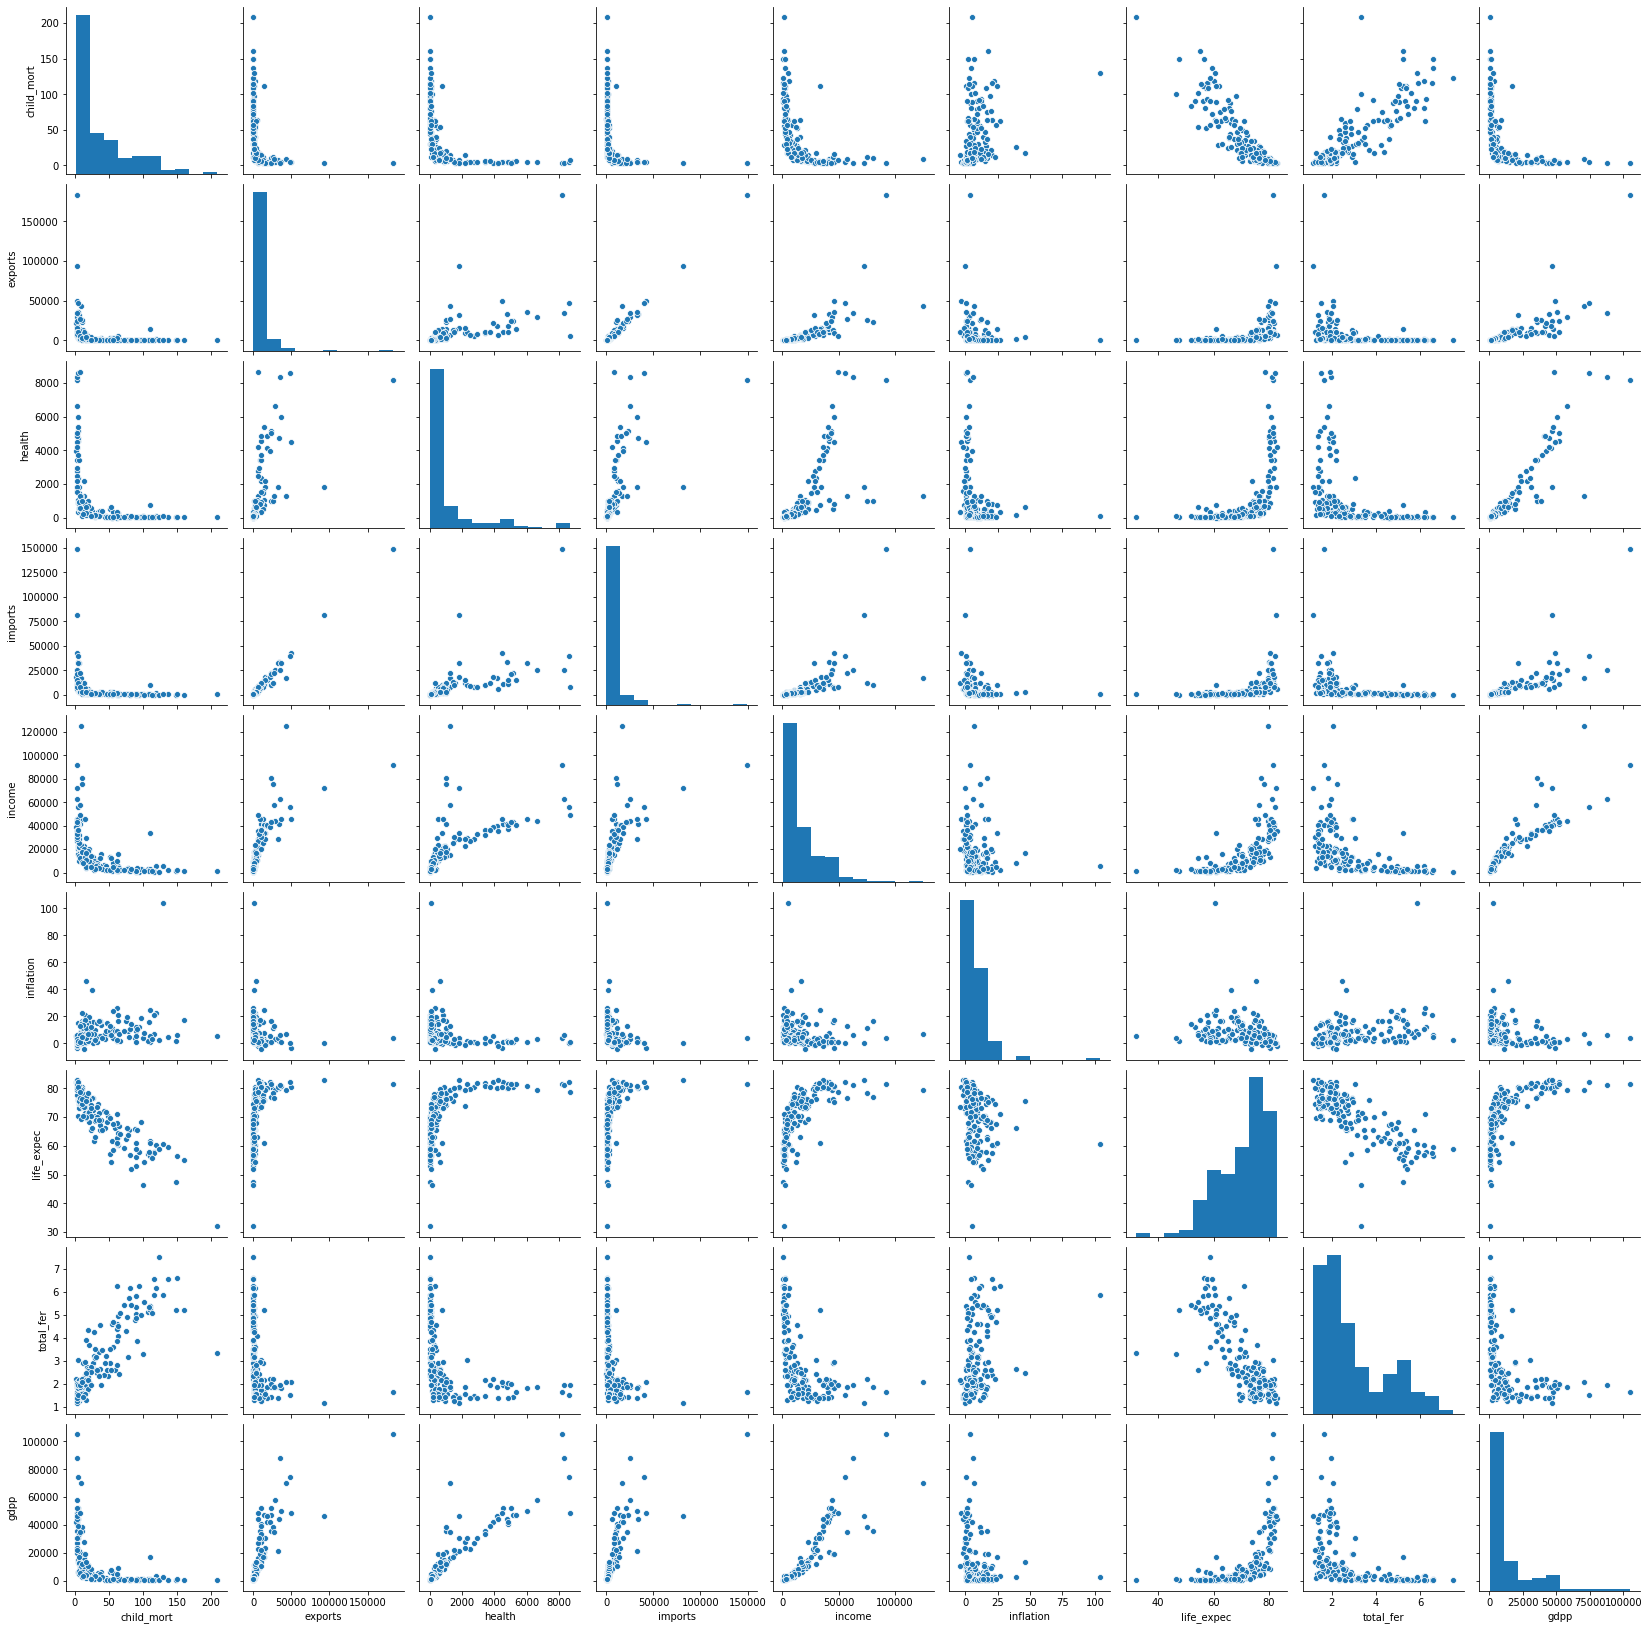

In [246]:
# bivariate analysis
# finding pairplot of numerical variables
sns.pairplot(df[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']])
plt.show()

Insights:
- As exports of a country increases ,gdp seem to increase as well 
- There is an inverse relationship between life expectancy and total fertility
- As income increases, gdpp of the country also increases.
- As income increases,expenditure on health also increases.
- From the plot above it is seeming that as exports increase there is increment in imports too.

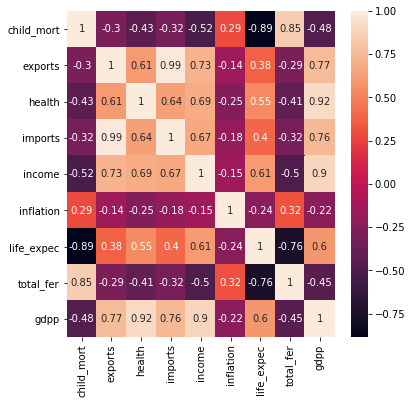

In [247]:
# plotting correlation matrix for numeric columns
plt.figure(figsize = (6,6))
sns.heatmap(df.corr(),annot = True)
plt.show()

Insights
- There is a high negative correlation between child mortality and life expectancy
- There is a high positive correlation between child mortality and total fertility
- There is a high positive correlation between exports and imports
- There is a high positive correlation between health and gdp

# DATA SCALING

In [248]:
# Applying scaling
scaler = StandardScaler()
df_scaled = df.copy()
columns = ['child_mort', 'exports', 'health', 'imports', 'income','inflation', 'life_expec', 'total_fer', 'gdpp']
df_scaled[columns] = scaler.fit_transform(df_scaled[columns])
df_scaled.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,1.291532,-0.411011,-0.565040,-0.432276,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,Albania,-0.538949,-0.350191,-0.439218,-0.313677,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,Algeria,-0.272833,-0.318526,-0.484826,-0.353720,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,Angola,2.007808,-0.291375,-0.532363,-0.345953,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,Antigua and Barbuda,-0.695634,-0.104331,-0.178771,0.040735,0.101732,-0.601749,0.704258,-0.541946,-0.041817


# HOPKINS STATISTIC

Before we go into clustering we need to check whether the data we have is suitable for clustering or not. This is where hopkins statistic comes in.

In [249]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [250]:
hopkins(df_scaled[columns])

0.9043516296730755

Hopkins statistic value of greater than 0.7 means the data has good clustering tendency ,since hopkins statistic is greater than 0.7 it means our data has high tendency of clustering and we can go ahead with clustering 

# HIERARCHICAL CLUSTERING USING SINGLE LINKAGE

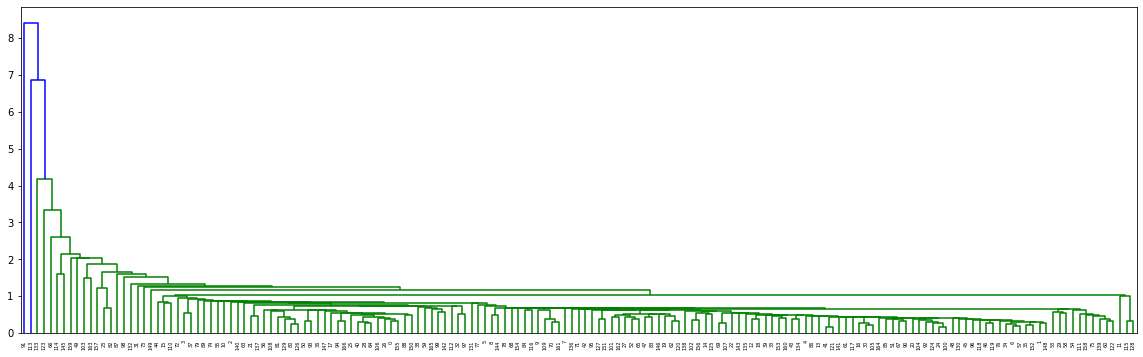

In [251]:
plt.figure(figsize = (20,6))
mergings_single = linkage(df_scaled[columns], method="single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

Here using single linkage we cannot interpret and things are not clear . Hence we will go for complete linkage

# HIERARCHICAL CLUSTERING USING COMPLETE LINKAGE 

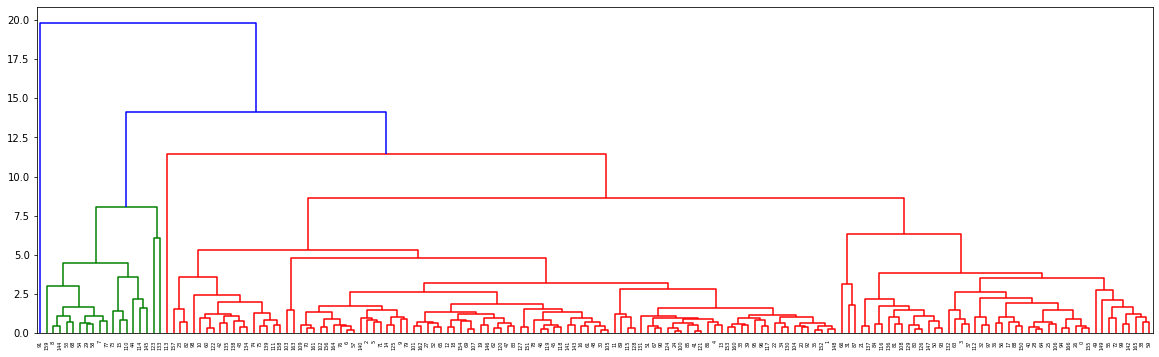

In [252]:
plt.figure(figsize = (20,6))
mergings_complete = linkage(df_scaled[columns], method="complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

Based on above dendogram it is better to build clustering with 3 and 4 no of clusters

### Using 3 clusters

In [253]:
# using 3 clusters
cluster_labels_hierarchical_3 = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
cluster_labels_hierarchical_3

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [254]:
# creating new data frame and attaching cluster labels to it
df_hierarchical_3 = df.copy()
df_hierarchical_3['cluster_labels_hierarchical_3'] = cluster_labels_hierarchical_3
df_hierarchical_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_hierarchical_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [255]:
# summarizing countries in each cluster
df_hierarchical_3.groupby(['cluster_labels_hierarchical_3']).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels_hierarchical_3,,,,,,,,,
0,42.630405,3598.749645,511.946183,3451.232447,12641.641892,8.561986,69.224324,3.098851,7551.445946
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000


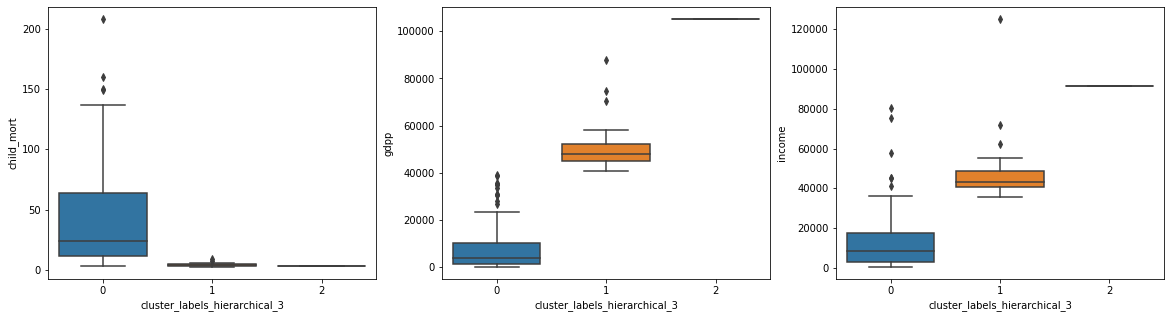

In [256]:
# plotting box plots to understand clusters
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_hierarchical_3', y='child_mort', data=df_hierarchical_3)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_hierarchical_3', y='gdpp', data=df_hierarchical_3)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_hierarchical_3', y='income', data=df_hierarchical_3)

plt.show()


Insights:
- Difference in clusters is clearly evident in gdp and income box plots
- We can see that cluster 1,2 are highly developed and cluster 0 is under developed based on gdp and income plots

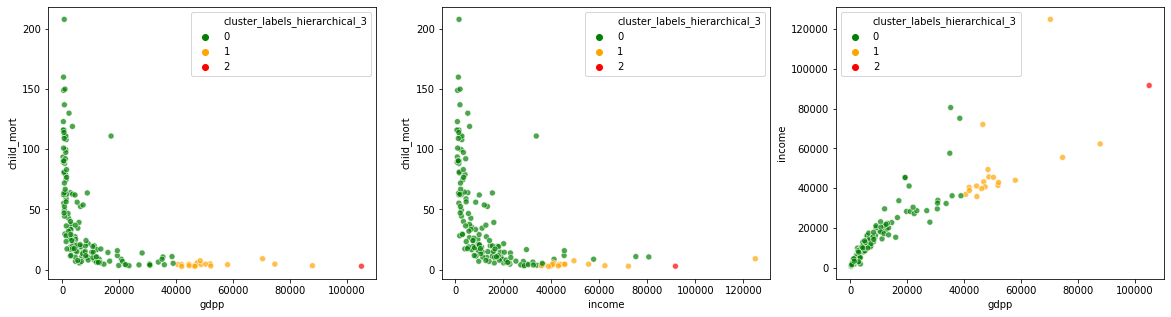

In [257]:
# plotting scatter plot to analyse further
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_hierarchical_3',data=df_hierarchical_3, legend='full',alpha=0.7,palette=['green','orange','red'])
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_hierarchical_3',data=df_hierarchical_3, legend='full', alpha=0.7,palette=['green','orange','red'])
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_hierarchical_3',data=df_hierarchical_3 ,legend='full', alpha=0.7,palette=['green','orange','red'])
plt.show()

Insights : 
- We can understand from the first and second scatter plot that cluster 0 has more child mortality than others 
- Also from the box plots plotted we observed that cluster 1,2 consists of developing and developed countries
- Cluster 0 consists of under developed countries .Cluster 0 has less income,less gdp and also high child mortality which also in reality represents nature of under developed countries


In [258]:
# List of countries which are under developed 
under_developed_countries_3 = df_hierarchical_3[df_hierarchical_3['cluster_labels_hierarchical_3'] == 0]
under_developed_countries_3.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_hierarchical_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.440,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.100,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,1946.70,834.3000,1648.000,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,669.76,141.6800,1458.660,6700,7.770,73.3,1.69,3220,0
9,Azerbaijan,39.2,3171.12,343.3920,1208.880,16000,13.800,69.1,1.92,5840,0
10,Bahamas,13.8,9800.00,2209.2000,12236.000,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,14386.50,1028.7900,10536.300,41100,7.440,76.0,2.16,20700,0


### Using 4 clusters

In [259]:
#using 4 clusters
cluster_labels_hierarchical_4 = cut_tree(mergings_complete, n_clusters=4).reshape(-1, )
cluster_labels_hierarchical_4

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [260]:
# creating new data frame and attaching cluster labels to it
df_hierarchical_4 = df.copy()
df_hierarchical_4['cluster_labels_hierarchical_4'] = cluster_labels_hierarchical_4
df_hierarchical_4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_hierarchical_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [261]:
# summarizing countries in each cluster
df_hierarchical_4.groupby(['cluster_labels_hierarchical_4']).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels_hierarchical_4,,,,,,,,,
0,42.036054,3619.220799,514.625198,3471.952259,12692.605442,7.912748,69.283673,3.080204,7586.965986
1,4.388889,29048.800000,5141.550556,24465.133333,50027.777778,1.598444,80.905556,1.780556,52355.555556
2,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000
3,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000


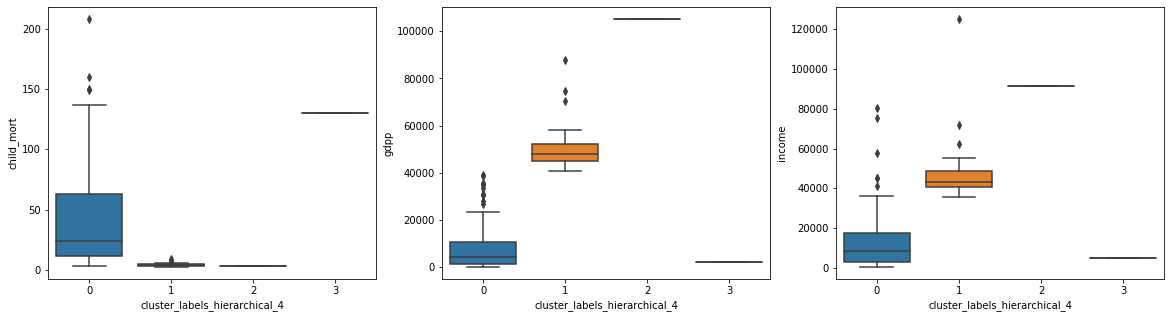

In [262]:
# plotting box plots to understand clusters
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_hierarchical_4', y='child_mort', data=df_hierarchical_4)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_hierarchical_4', y='gdpp', data=df_hierarchical_4)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_hierarchical_4', y='income', data=df_hierarchical_4)

plt.show()


Insights : 
-  Difference in clusters is evident in gdp and income box plots

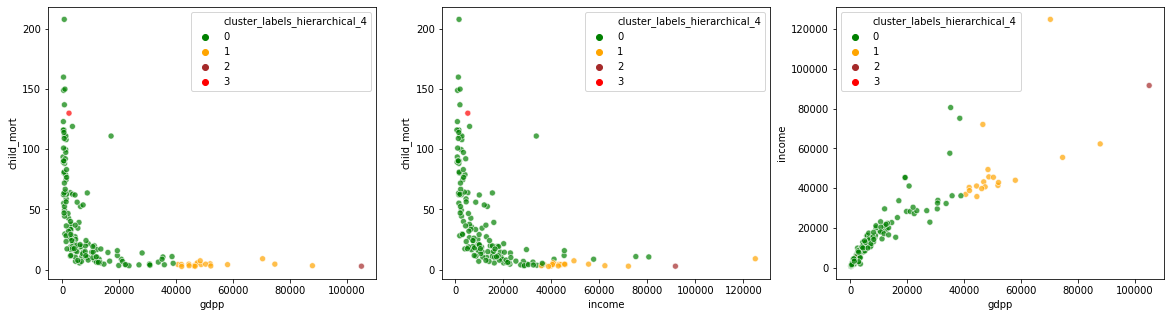

In [263]:
# plotting scatter plot to analyse further
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_hierarchical_4',data=df_hierarchical_4, legend='full',alpha=0.7,palette=['green','orange','brown','red'])
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_hierarchical_4',data=df_hierarchical_4, legend='full', alpha=0.7,palette=['green','orange','brown','red'])
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_hierarchical_4',data=df_hierarchical_4 ,legend='full', alpha=0.7,palette=['green','orange','brown','red'])
plt.show()

In [264]:
# checking cluster id 3
df_hierarchical_4[df_hierarchical_4['cluster_labels_hierarchical_4'] == 3]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_hierarchical_4
113,Nigeria,130.0,589.49,118.131,405.42,5150,104.0,60.5,5.84,2330,3


Insights : 
- cluster 3 represents only one country.
- From both scatter and box plots it can be seen that cluster 0 has less income and high mortality rate.Therefore we have an option to suggest CEO with the countries in cluster 0
- But if we go with cluster 0 here we will be missing out nigeria country(cluster 3) which has high mortality rate.Therefore when we suggest CEO with cluster 0 ,nigeria country will be missing out for financial aid.Therefore it is not suggested to go with this 4 number of clusters
- Hence ideal number of clusters will be 3 which also captures nigeria country in cluster 0

So optimal no of clusters using hierarchical clustering is 3

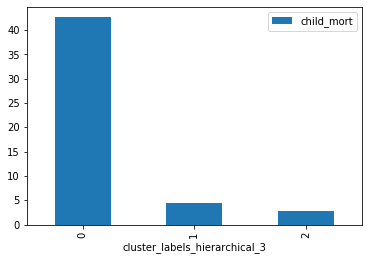

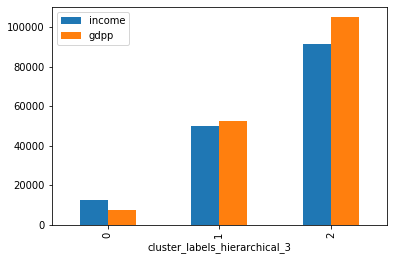

In [265]:
# plotting better visualisation 
df_hierarchical_3[['cluster_labels_hierarchical_3','child_mort']].groupby('cluster_labels_hierarchical_3').mean().plot.bar()
df_hierarchical_3[['cluster_labels_hierarchical_3','income','gdpp']].groupby('cluster_labels_hierarchical_3').mean().plot.bar()

Insights : 
- Cluster 0 has the highest averaged mortality rate which is above 40.
- Cluster 1 has the lowest averaged income and gdp 

Therefore cluster 0 seems to be under developed and needs financial aid

In [266]:
# checking percentage of points in eachc cluster
df_hierarchical_3['cluster_labels_hierarchical_3'].value_counts()/sum(df_hierarchical_3['cluster_labels_hierarchical_3'].value_counts())

0    0.886228
1    0.107784
2    0.005988
Name: cluster_labels_hierarchical_3, dtype: float64

Here we can see that most of the countries go into cluster 0 which composes of under developed countries ,almost 90 percent which is not good.Here hierarchical clustering is not giving good solution to us as 90 percent of the points are under developed according to hierarchical clustering . also increasing number of clusters is not giving good results as we have seen before.Let us go with k means.

# K MEANS

### Finding optimal number of clusters (SSD)

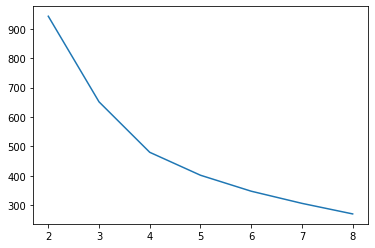

In [267]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled[columns])
    #inertia : Sum of squared distances of samples to their closest cluster center.
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(range_n_clusters,ssd)

### Finding optimal number of clusters (Silhouette analysis)

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

For n_clusters=2, the silhouette score is 0.45863306035476264
For n_clusters=3, the silhouette score is 0.4218615812599681
For n_clusters=4, the silhouette score is 0.4277518271600435
For n_clusters=5, the silhouette score is 0.43077513396770467
For n_clusters=6, the silhouette score is 0.29009698430195435
For n_clusters=7, the silhouette score is 0.2975578389355962
For n_clusters=8, the silhouette score is 0.29826424916589667


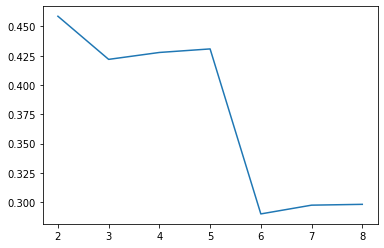

In [268]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouettescore = []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df_scaled[columns])
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(df_scaled[columns], cluster_labels)
    silhouettescore.append(silhouette_avg)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
plt.plot(range_n_clusters,silhouettescore)

Insight : 
From the above silhouette analysis we can see that 2,3,4,5 seem to optimal number of clusters

### Using 2 clusters

In [269]:
# using 2 clusters
kmeans_2 = KMeans(n_clusters=2, max_iter=100)
kmeans_2.fit(df_scaled[columns])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [270]:
kmeans_2.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [271]:
# creating a new data frame and attaching cluster labels to it
df_kmeans_2 = df.copy()
df_kmeans_2['cluster_labels_kmeans_2'] = kmeans_2.labels_
df_kmeans_2.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_2
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


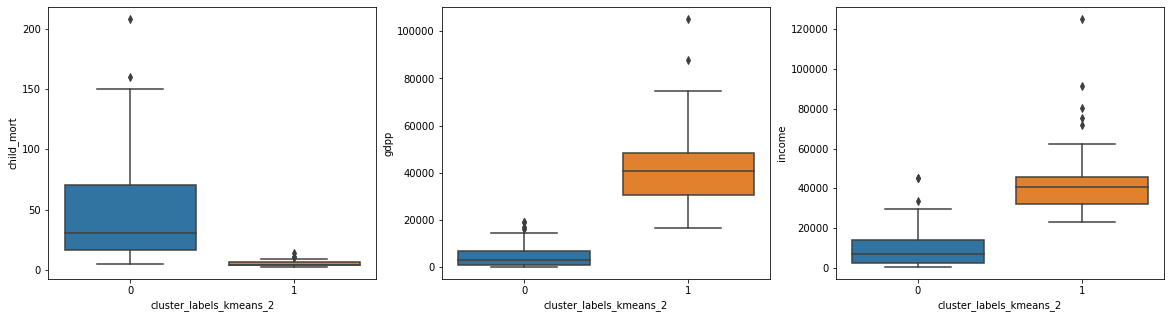

In [272]:
# plotting box plots to understand clusters
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_kmeans_2', y='child_mort', data=df_kmeans_2)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_kmeans_2', y='gdpp', data=df_kmeans_2)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_kmeans_2', y='income', data=df_kmeans_2)

plt.show()


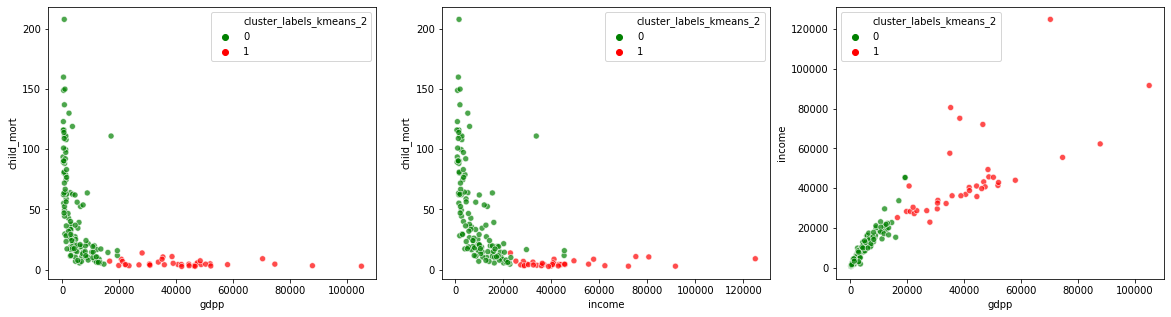

In [273]:
# plotting scatter plot to analyse further
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_kmeans_2',data=df_kmeans_2, legend='full',alpha=0.7,palette=['green','red'])
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_kmeans_2',data=df_kmeans_2, legend='full', alpha=0.7,palette=['green','red'])
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_kmeans_2',data=df_kmeans_2 ,legend='full', alpha=0.7,palette=['green','red'])
plt.show()

In [274]:
df_kmeans_2['cluster_labels_kmeans_2'].value_counts()/sum(df_kmeans_2['cluster_labels_kmeans_2'].value_counts())

0    0.778443
1    0.221557
Name: cluster_labels_kmeans_2, dtype: float64

Here we can see that most of the countries go into cluster 0 which composes of under developed countries ,almost 80 percent which is not good.Here k means clustering is not giving good solution for 2 clusters as 80 percent of the points are under developed according to the algorithm .So going for 3 clusters

### Using 3 CLUSTERS

In [275]:
# using 3 clusters
kmeans_3 = KMeans(n_clusters=3, max_iter=100)
kmeans_3.fit(df_scaled[columns])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [276]:
# checking labels
kmeans_3.labels_

array([0, 2, 2, 0, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 2, 2, 0,
       2, 1, 2, 0, 0, 2, 0, 1, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 2, 1, 2,
       1, 2, 2, 2, 2, 0, 0, 2, 2, 1, 1, 0, 0, 2, 1, 0, 2, 2, 2, 0, 0, 2,
       0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 2, 0, 0, 1, 2, 0, 2, 2, 0,
       0, 2, 2, 1, 2, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       1, 1, 0, 0, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 0, 2, 2, 0, 2, 2,
       0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 0, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 2, 2, 2, 2, 2, 0, 0])

In [277]:
# creating a new data frame and attaching cluster labels to it
df_kmeans_3 = df.copy()
df_kmeans_3['cluster_labels_kmeans_3'] = kmeans_3.labels_
df_kmeans_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_3
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2


In [278]:
# checking number of countries in each cluster
df_kmeans_3['cluster_labels_kmeans_3'].value_counts()

2    91
0    48
1    28
Name: cluster_labels_kmeans_3, dtype: int64

In [279]:
# summarizing countries in each cluster
df_kmeans_3.groupby(['cluster_labels_kmeans_3']).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels_kmeans_3,,,,,,,,,
0,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
1,5.046429,31038.239286,4327.163214,25818.100000,50178.571429,3.014679,80.514286,1.760714,48114.285714
2,20.357143,3604.149434,547.279455,3710.446386,13968.021978,7.070549,73.460440,2.235055,7979.912088


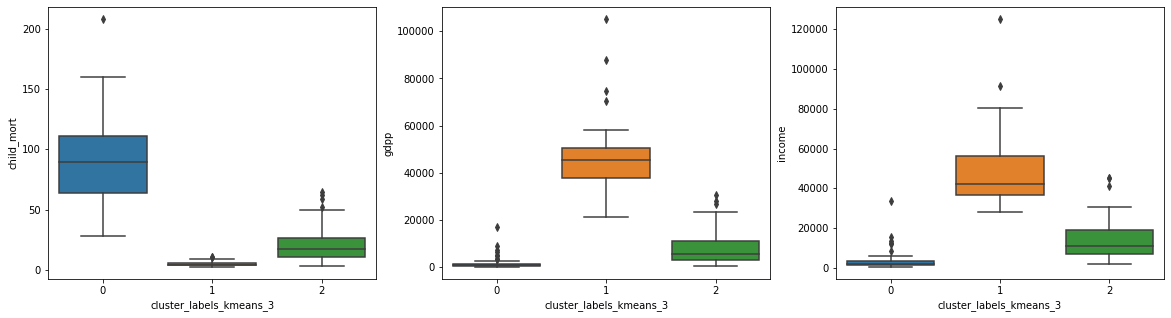

In [280]:
# plotting box plots to understand clusters
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_kmeans_3', y='child_mort', data=df_kmeans_3)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_kmeans_3', y='gdpp', data=df_kmeans_3)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_kmeans_3', y='income', data=df_kmeans_3)

plt.show()


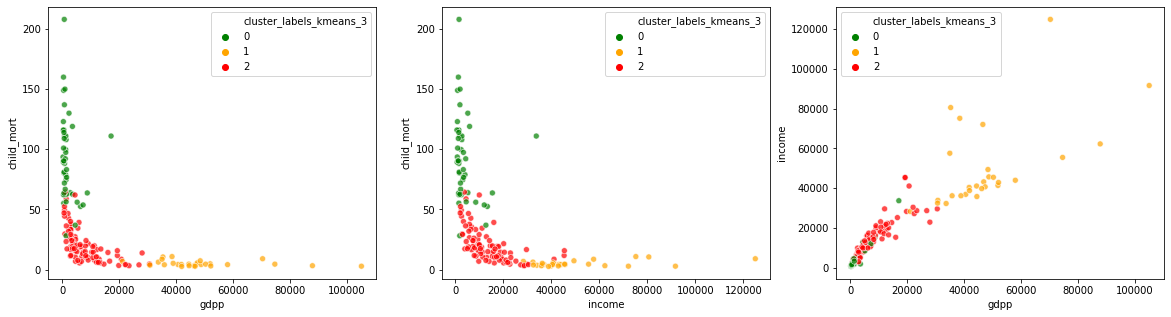

In [281]:
# plotting scatter plot to analyse further
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_kmeans_3',data=df_kmeans_3, legend='full',alpha=0.7,palette=['green','orange','red'])
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_kmeans_3',data=df_kmeans_3, legend='full', alpha=0.7,palette=['green','orange','red'])
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_kmeans_3',data=df_kmeans_3 ,legend='full', alpha=0.7,palette=['green','orange','red'])
plt.show()

From the above box plots and scatter plots we can infer Cluster 0 has high mortality rate and has less income and less gdp

In [282]:
# Countries in cluster 0
df_kmeans_3[df_kmeans_3['cluster_labels_kmeans_3']==0]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_3
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.920,57.1,2.88,6350,0
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,0
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,0
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,0


### Using 4 clusters

In [283]:
# using 4 clusters
kmeans_4 = KMeans(n_clusters=4, max_iter=100)
kmeans_4.fit(df_scaled[columns])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [285]:
# checking labels
kmeans_4.labels_

array([2, 0, 0, 2, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 0, 0, 0, 2,
       0, 3, 0, 2, 2, 0, 2, 3, 0, 2, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 3, 0,
       3, 0, 0, 0, 0, 2, 2, 0, 0, 3, 3, 2, 2, 0, 3, 2, 3, 0, 0, 2, 2, 0,
       2, 0, 3, 0, 0, 0, 2, 3, 3, 3, 0, 3, 0, 0, 2, 2, 3, 0, 2, 0, 0, 2,
       2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       3, 3, 2, 2, 3, 0, 2, 0, 0, 0, 0, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 1, 0, 3, 2, 2, 0, 3, 0, 0, 2, 0, 3, 3, 0, 2, 0, 2, 2, 0, 0, 0,
       0, 2, 0, 3, 3, 3, 0, 0, 0, 0, 0, 2, 2])

In [286]:
# creating a new data frame and attaching cluster labels to it
df_kmeans_4 = df.copy()
df_kmeans_4['cluster_labels_kmeans_4'] = kmeans_4.labels_
df_kmeans_4.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_4
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,2
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,2
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


In [287]:
# checking number of countries in each cluster
df_kmeans_4['cluster_labels_kmeans_4'].value_counts()

0    88
2    48
3    29
1     2
Name: cluster_labels_kmeans_4, dtype: int64

In [288]:
# summarizing countries in each cluster
df_kmeans_4.groupby(['cluster_labels_kmeans_4']).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels_kmeans_4,,,,,,,,,
0,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364
1,2.800000,138475.000000,5001.930000,115092.000000,81900.000000,1.787000,82.000000,1.390000,75800.000000
2,91.610417,879.063521,114.821765,827.028771,3897.354167,11.911146,59.239583,4.992083,1909.208333
3,5.082759,21511.096552,4084.970000,18129.900000,45800.000000,2.837690,80.403448,1.813793,44017.241379


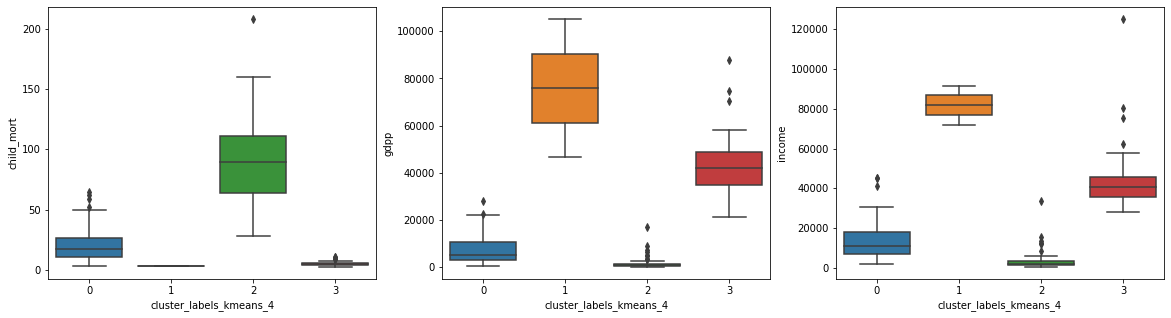

In [289]:
# plotting box plots to understand clusters
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_kmeans_4', y='child_mort', data=df_kmeans_4)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_kmeans_4', y='gdpp', data=df_kmeans_4)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_kmeans_4', y='income', data=df_kmeans_4)

plt.show()


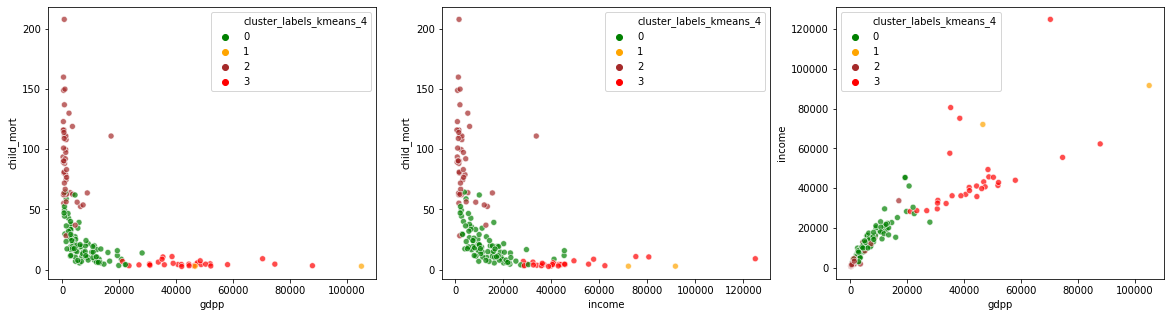

In [290]:
# plotting scatter plot to analyse further
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_kmeans_4',data=df_kmeans_4, legend='full',alpha=0.7,palette=['green','orange','brown','red'])
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_kmeans_4',data=df_kmeans_4, legend='full', alpha=0.7,palette=['green','orange','brown','red'])
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_kmeans_4',data=df_kmeans_4,legend='full', alpha=0.7,palette=['green','orange','brown','red'])
plt.show()

From the above box plots and scatter plots we can infer that cluster 2 has high child mortality rate and has less income and less gdp.

In [291]:
# checking cluster 2
df_kmeans_4[df_kmeans_4['cluster_labels_kmeans_4'] == 2]

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_4
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,2
3,Angola,119.0,2199.1900,100.6050,1514.370,5900,22.400,60.1,6.16,3530,2
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,2
21,Botswana,52.5,2768.6000,527.0500,3257.550,13300,8.920,57.1,2.88,6350,2
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,2
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,2
28,Cameroon,108.0,290.8200,67.2030,353.700,2660,1.910,57.3,5.11,1310,2
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,2
32,Chad,150.0,330.0960,40.6341,390.195,1930,6.390,56.5,6.59,897,2
36,Comoros,88.2,126.8850,34.6819,397.573,1410,3.870,65.9,4.75,769,2


### Using 5 clusters

In [292]:
# using 5 clusters
kmeans_5 = KMeans(n_clusters=5, max_iter=100)
kmeans_5.fit(df_scaled[columns])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [293]:
# checking labels
kmeans_5.labels_

array([0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 0,
       1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 2, 1,
       2, 1, 1, 1, 1, 0, 0, 1, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1,
       0, 1, 2, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 0, 1, 1, 0,
       0, 1, 1, 4, 1, 0, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       2, 2, 0, 3, 2, 1, 0, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 2, 1, 2, 0, 0, 1, 2, 1, 1, 0, 1, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0])

In [294]:
# creating a new data frame and attaching cluster labels to it
df_kmeans_5 = df.copy()
df_kmeans_5['cluster_labels_kmeans_5'] = kmeans_5.labels_
df_kmeans_5.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_5
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,1
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,1


In [295]:
# checking number of countries in each cluster
df_kmeans_5['cluster_labels_kmeans_5'].value_counts()

1    88
0    47
2    30
4     1
3     1
Name: cluster_labels_kmeans_5, dtype: int64

In [296]:
# summarizing countries in each cluster
df_kmeans_5.groupby(['cluster_labels_kmeans_5']).mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
cluster_labels_kmeans_5,,,,,,,,,
0,90.793617,885.224660,114.751355,835.999170,3870.702128,9.951809,59.212766,4.974043,1900.255319
1,20.918182,3366.778392,482.897845,3461.435467,13455.568182,7.295045,73.222727,2.242159,7332.636364
2,5.006667,23900.726667,4010.316333,20228.370000,46676.666667,2.741567,80.480000,1.791667,44103.333333
3,130.000000,589.490000,118.131000,405.420000,5150.000000,104.000000,60.500000,5.840000,2330.000000
4,2.800000,183750.000000,8158.500000,149100.000000,91700.000000,3.620000,81.300000,1.630000,105000.000000


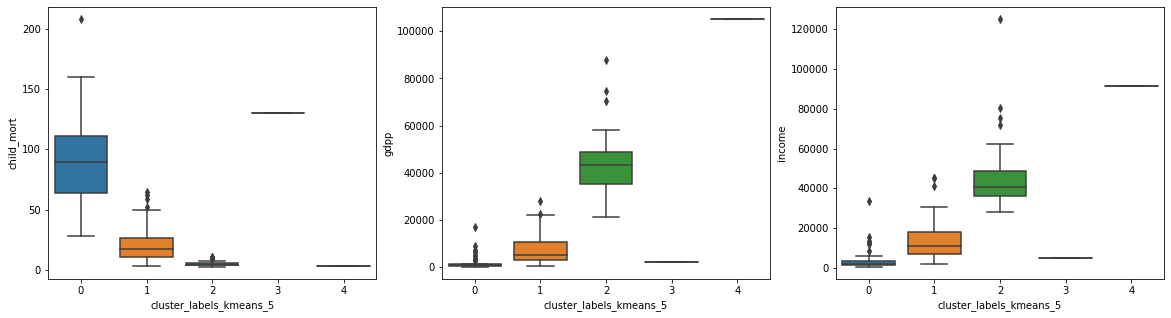

In [297]:
# plotting box plots to understand clusters
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.boxplot(x='cluster_labels_kmeans_5', y='child_mort', data=df_kmeans_5)
plt.subplot(1, 3, 2)
sns.boxplot(x='cluster_labels_kmeans_5', y='gdpp', data=df_kmeans_5)
plt.subplot(1, 3, 3)
sns.boxplot(x='cluster_labels_kmeans_5', y='income', data=df_kmeans_5)

plt.show()


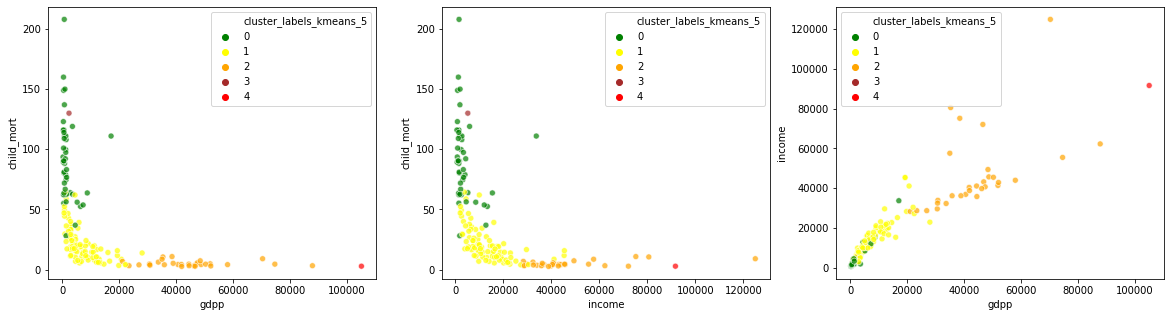

In [298]:
# plotting scatter plot to analyse further
plt.figure(figsize=(20, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='gdpp', y='child_mort', hue='cluster_labels_kmeans_5',data=df_kmeans_5, legend='full',alpha=0.7,palette=['green','yellow','orange','brown','red'])
plt.subplot(1, 3, 2)
sns.scatterplot(x='income', y='child_mort', hue='cluster_labels_kmeans_5',data=df_kmeans_5, legend='full', alpha=0.7,palette=['green','yellow','orange','brown','red'])
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp', y='income', hue='cluster_labels_kmeans_5',data=df_kmeans_5,legend='full', alpha=0.7,palette=['green','yellow','orange','brown','red'])
plt.show()

From the above box plots,scatter plots we can see cluster 0 has high child mortality rate and have less income and less gdp.

Final selection of model:
-At starting from the silhouette analysis we found it is better to go with 2,3,4,5 clusters and after creating models for all,2 cluster model is not good as 80 percent of the points go into a single cluster so k means for 2 clusters is giving not that good solution. it is better to go with 3 cluster model because we are getting balanced size of clusters in this model also we can see significant drop from 2 to 3 in elbow curve ,therefore 3 is the optimal number of clusters

In a business aspect as well 3 cluster seems to be interpretable as under developed,developing,developed countries.So best seletion is 3 clusters

# FINAL MODEL

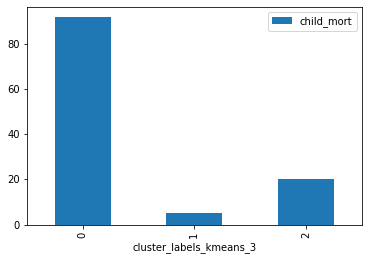

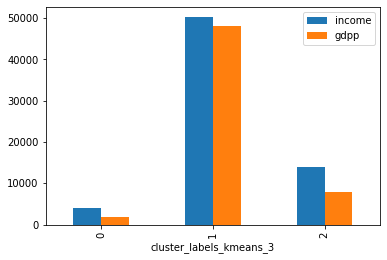

In [299]:
# plotting better visualisation 
df_kmeans_3[['cluster_labels_kmeans_3','child_mort']].groupby('cluster_labels_kmeans_3').mean().plot.bar()
df_kmeans_3[['cluster_labels_kmeans_3','income','gdpp']].groupby('cluster_labels_kmeans_3').mean().plot.bar()

Insights : 
- cluster 0 has highest child mortality rate and less income,less gdp which tells us that it comprises about under developed countries
- Cluster 2 has medium child mortality rate and medium range income,medium range gdp which tells us that it comprises about developing countries
- Cluster 1 has lowest child mortality rate and highest income,highest gdp which tells us that it comprises about developed countries

# CLUSTER RENAMING

In [300]:
df_kmeans_3['development_status'] = df_kmeans_3['cluster_labels_kmeans_3']
rename_dict = {0 : 'Únder_developed',2 : 'Developing',1:'Developed'}
df_kmeans_3['development_status'] = df_kmeans_3['development_status'].map(rename_dict)
df_kmeans_3.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_3,development_status
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,0,Únder_developed
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,2,Developing
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,2,Developing
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,0,Únder_developed
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,2,Developing


# ANALYSING UNDER DEVELOPED COUNTRIES

In [301]:
# creating final data of under developed countries in one data frame
df_final_underdev = df_kmeans_3[df_kmeans_3['cluster_labels_kmeans_3']==0]
df_final_underdev.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_3,development_status
0,Afghanistan,90.2,55.300,41.9174,248.297,1610,9.440,56.2,5.82,553,0,Únder_developed
3,Angola,119.0,2199.190,100.6050,1514.370,5900,22.400,60.1,6.16,3530,0,Únder_developed
17,Benin,111.0,180.404,31.0780,281.976,1820,0.885,61.8,5.36,758,0,Únder_developed
21,Botswana,52.5,2768.600,527.0500,3257.550,13300,8.920,57.1,2.88,6350,0,Únder_developed
25,Burkina Faso,116.0,110.400,38.7550,170.200,1430,6.810,57.9,5.87,575,0,Únder_developed


In [302]:
df_final_underdev[['child_mort','gdpp','income']].describe()

,child_mort,gdpp,income
count,48.000000,48.000000,48.000000
mean,91.610417,1909.208333,3897.354167
std,34.319855,2925.911009,5590.168621
min,28.100000,231.000000,609.000000
25%,63.675000,551.500000,1390.000000
50%,89.750000,932.000000,1860.000000
75%,111.000000,1465.000000,3522.500000
max,208.000000,17100.000000,33700.000000


Insight:
- Here from the descriptive statistics above we can see that there are countries with very high income as there is a lot of difference between incomes,gdp at 75 percent and max .

# FILTERING FURTHER

Order of priority for financial aid is gdp > income > child mortality.We first filter the countries based on less gdp, then less income and finally high mortality rate

- The reason is gdp is the primary measure of how country is doing on a whole, as it covers everything including goods,services,money . Therefore filtering the under developed countries based on this gdp will be our first priority.

- The second priority will be income as self income per person is important as it tells us about financial status of each person .if it is less it means that country is under developed.

- Finally our third priority is child mortality as this child mortality rate depends on income and gdp. if a country has good income,goods,services then it is likely to have less child mortality rate.Therefore if we first filter countries based on gdp,income we indirectly are addressing child mortality rate problem too. Therefore child mortality rate will be our third priority

### Filtering based on gdp

In [303]:
# we find countries which have less gdp
# we filter rows based on median of our df_final_underdev data frame ,since median is not sensitive to outliers
median_gdp = np.median(df_final_underdev['gdpp'])
median_gdp

932.0

In [304]:
# we are finding countries which are less than the median gdp 
under_developed_countries = df_final_underdev[df_final_underdev['gdpp'] <= median_gdp]
under_developed_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_3,development_status
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0,Únder_developed
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0,Únder_developed
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0,Únder_developed
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0,Únder_developed
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0,Únder_developed


### Filtering based on income

In [305]:
# we find countries which have less income
# we filter rows based on median of our df_final_underdev data frame ,since median is not sensitive to outliers
median_income = np.median(df_final_underdev['income'])
median_income

1860.0

In [306]:
# we are finding countries which are less than the median income 
under_developed_countries = under_developed_countries[under_developed_countries['income'] <= median_income]
under_developed_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_3,development_status
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0,Únder_developed
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0,Únder_developed
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0,Únder_developed
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0,Únder_developed
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0,Únder_developed


### Filtering based on child mortality

In [307]:
# we find countries which have high child mortality
# we filter rows based on median of our df_final_underdev data frame ,since median is not sensitive to outliers
median_child_mortality = np.median(df_final_underdev['child_mort'])
median_child_mortality

89.75

In [308]:
# we are finding countries which are greater than the median child mortality 
under_developed_countries = under_developed_countries[under_developed_countries['child_mort'] >= median_child_mortality]
under_developed_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_3,development_status
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0,Únder_developed
17,Benin,111.0,180.4040,31.0780,281.976,1820,0.885,61.8,5.36,758,0,Únder_developed
25,Burkina Faso,116.0,110.4000,38.7550,170.200,1430,6.810,57.9,5.87,575,0,Únder_developed
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0,Únder_developed
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0,Únder_developed


In [309]:
under_developed_countries.shape

(14, 12)

In [310]:
#arranging under developed countries according to less gdp first ,less income next and finally high mortality rate
under_developed_countries=under_developed_countries.sort_values([ 'gdpp', 'income','child_mort'], ascending=[True, True, False])
under_developed_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_3,development_status
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.300,57.7,6.26,231,0,Únder_developed
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.800,57.5,6.54,334,0,Únder_developed
112,Niger,123.0,77.2560,17.9568,170.868,814,2.550,58.8,7.49,348,0,Únder_developed
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.200,55.0,5.20,399,0,Únder_developed
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.640,54.5,5.56,419,0,Únder_developed
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.010,47.5,5.21,446,0,Únder_developed
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.100,53.1,5.31,459,0,Únder_developed
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.180,58.7,4.87,488,0,Únder_developed
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.970,55.6,5.05,547,0,Únder_developed
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.440,56.2,5.82,553,0,Únder_developed


# FINAL TOP 10 UNDER DEVELOPED COUNTRIES

In [311]:
under_developed_top10 = under_developed_countries.head(10)
under_developed_top10

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels_kmeans_3,development_status
26,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,0,Únder_developed
37,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,0,Únder_developed
112,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,0,Únder_developed
132,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,0,Únder_developed
106,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,0,Únder_developed
31,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,0,Únder_developed
94,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,0,Únder_developed
150,Togo,90.3,196.1760,37.3320,279.624,1210,1.18,58.7,4.87,488,0,Únder_developed
64,Guinea-Bissau,114.0,81.5030,46.4950,192.544,1390,2.97,55.6,5.05,547,0,Únder_developed
0,Afghanistan,90.2,55.3000,41.9174,248.297,1610,9.44,56.2,5.82,553,0,Únder_developed


In [312]:
under_developed_top10[['child_mort','income','gdpp']].describe()

,child_mort,income,gdpp
count,10.00000,10.000000,10.00000
mean,112.76000,1045.300000,422.40000
std,25.11344,309.034356,99.62396
min,90.20000,609.000000,231.00000
25%,91.27500,832.500000,360.75000
50%,107.50000,974.000000,432.50000
75%,121.25000,1217.500000,480.75000
max,160.00000,1610.000000,553.00000
